## ini untuk menggugah file


In [ ]:

from google.colab import files
uploaded = files.upload()

Saving klasifikasimhs.csv to klasifikasimhs.csv


#Import Pustaka




In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
data  = pd.read_csv('klasifikasimhs.csv')
print(data.head())
print(data.info())
print(data.describe())

   Tempat Tinggal Pekerjaan Orang Tua  Penghasilan Orang Tua  \
0               0                 PNS               10000000   
1               0           TNI/POLRI                8000000   
2               1              Petani                4000000   
3               1             Nelayan                3000000   
4               0               Buruh                2000000   

   Jumlah Tanggungan Orang Tua  Kendaraan Kelayakan Keringanan UKT  
0                            3          1                        0  
1                            2          2                        1  
2                            4          0                        0  
3                            5          1                        0  
4                            2          1                        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       -------

##Membaca file

In [ ]:
# Assuming 'data' is your DataFrame loaded in the previous cell
if data.duplicated().sum() > 0:
    print(f"Number of duplicate rows found: {data.duplicated().sum()}")

    data.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")
else:
    print("No duplicate rows found.")

Number of duplicate rows found: 77
Duplicate rows have been removed.


In [ ]:
##Memberikan informasi detail tentang struktur dataframe

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Tempat Tinggal               23 non-null     int64 
 1   Pekerjaan Orang Tua          23 non-null     object
 2   Penghasilan Orang Tua        23 non-null     int64 
 3   Jumlah Tanggungan Orang Tua  23 non-null     int64 
 4   Kendaraan                    23 non-null     int64 
 5   Kelayakan Keringanan UKT     23 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.3+ KB


##Mengubah data menjadi sebuah DataFrame


In [ ]:
data = pd.DataFrame(data)

##digunakan untuk mengubah data kategorikal pada kolom Pekerjaan Orang Tua menjadi bentuk numerik sehingga dapat digunakan dalam model machine learning.

In [ ]:
encoder = LabelEncoder()
data['Pekerjaan Orang Tua'] = encoder.fit_transform(data['Pekerjaan Orang Tua'])

##digunakan untuk menstandarisasi data numerik pada kolom Kendaraan dan Tempat Tinggal menggunakan metode z-score normalization. Standarisasi ini memastikan bahwa setiap fitur memiliki rata-rata 0 dan standar deviasi 1.

In [ ]:
scaler = StandardScaler()
numerical_features = ["Kendaraan", 'Tempat Tinggal']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

##digunakan untuk mempersiapkan dataset untuk pelatihan dan pengujian model machine learning. Proses ini melibatkan pemisahan fitur (X) dan target (y), serta membagi data menjadi set pelatihan (training set) dan pengujian (test set).

In [ ]:
X = data.drop('Kelayakan Keringanan UKT', axis=1)
y = data['Kelayakan Keringanan UKT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(data[data['Kelayakan Keringanan UKT'] == '1 1'])

    Tempat Tinggal  Pekerjaan Orang Tua  Penghasilan Orang Tua  \
95       -1.044466                    4                9000000   

    Jumlah Tanggungan Orang Tua  Kendaraan Kelayakan Keringanan UKT  
95                            2   1.516575                      1 1  


##digunakan untuk menyaring dan menampilkan baris-baris dari dataset data yang memiliki nilai '1 1' di kolom Kelayakan Keringanan UKT.

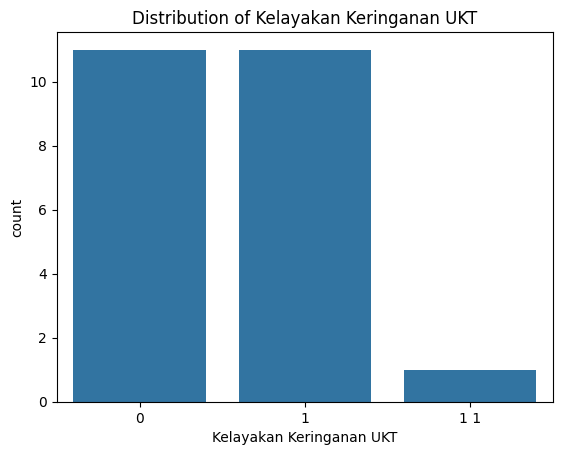

In [ ]:
sns.countplot(x='Kelayakan Keringanan UKT', data=data)
plt.title('Distribution of Kelayakan Keringanan UKT')
plt.show()

##Mengonversi kolom 'Kelayakan Keringanan UKT' menjadi numerik

In [ ]:
# Convert 'Kelayakan Keringanan UKT' column to numeric, handling errors
data['Kelayakan Keringanan UKT'] = pd.to_numeric(data['Kelayakan Keringanan UKT'], errors='coerce')



##Menghapus baris dengan nilai NaN

In [ ]:
data = data.dropna()

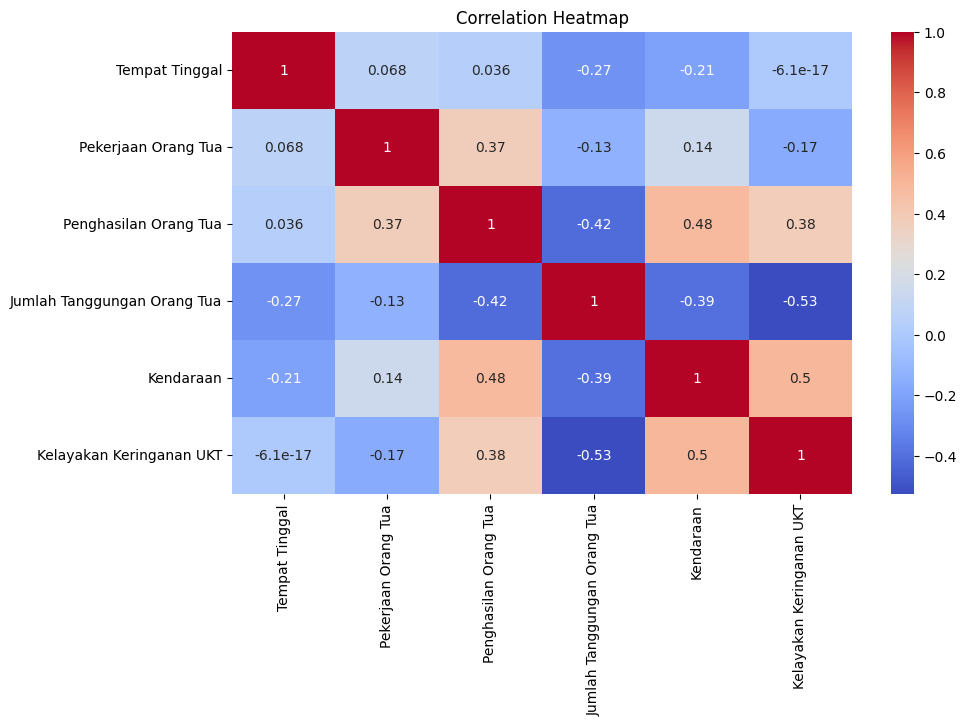

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##digunakan untuk membuat boxplot (plot kotak) dengan tujuan memvisualisasikan distribusi data dan mendeteksi pola atau anomali (outliers) antara dua variabel,

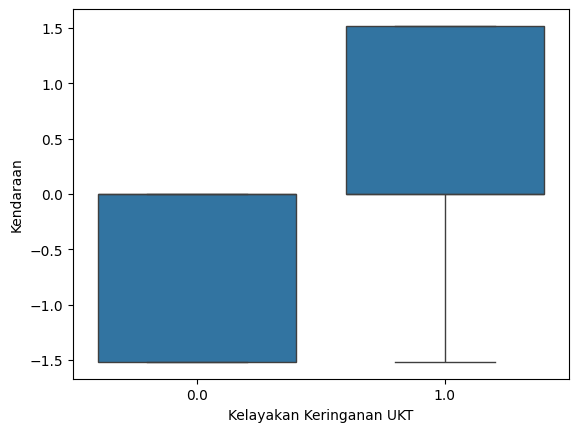

In [ ]:
sns.boxplot(x='Kelayakan Keringanan UKT', y='Kendaraan', data=data)
plt.show()


##digunakan untuk membuat dan melatih Support Vector Machine (SVM)


In [ ]:
model = SVC()
model.fit(X_train, y_train)

SVC()

##digunakan untuk evaluasi performa model yang sudah dilatih dengan menggunakan data uji (X_test dan y_test)

In [ ]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5

Accuracy: 0.60


##digunakan untuk membuat dan menampilkan Confusion Matrix dalam bentuk visual, yang merupakan alat penting untuk mengevaluasi performa model klasifikasi.

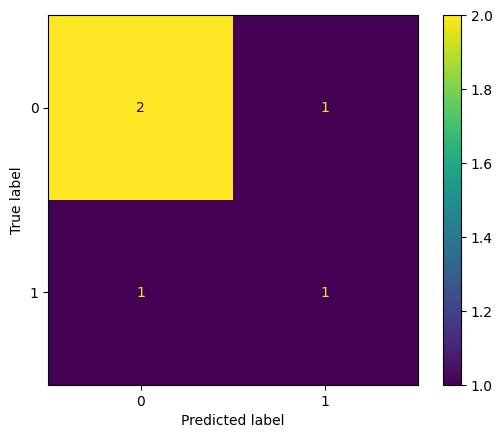

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

##Simpan model


In [ ]:


# Simpan model menggunakan joblib
joblib.dump(model, 'model.joblib')

# Untuk memuat model kembali:
# model = joblib.load('model.joblib')

['model.joblib']